In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import lfilter

In [134]:
df = pd.read_csv('data.txt')
df.head()

,GyZ,GyY,GyX,Tmp,AcZ,AcY,AcX
0,7.90,110.50,-397.95,25.90411,-16.19922,89.59999,-3.600006
1,8.90,116.40,-400.60,25.92529,-11.19922,68.40000,-4.599976
2,6.70,113.10,-395.20,25.87117,-34.40039,50.59999,-0.600006
3,6.30,105.95,-394.50,25.92765,-26.00000,81.40001,-25.600040
4,3.15,115.10,-396.60,25.88765,-41.39844,57.00000,11.200010


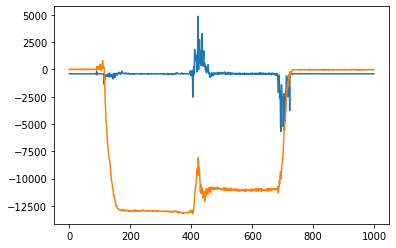

In [141]:
plt.plot(df.GyX)
plt.plot(df.AcX)

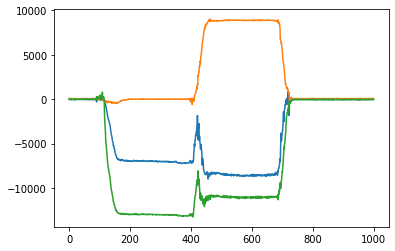

In [137]:
plt.plot(df.AcZ)
plt.plot(df.AcY)
plt.plot(df.AcX)

In [122]:
with open('data.txt','r') as data:
    d = [line.rstrip('\n') for line in data.readlines()]

# eval(d[0])
gyz,gyy,gyx = [],[],[]
temp = []
az, ay, ax = [],[],[]

for entry in d:
    dd = eval(entry)
    gZ,gY,gX,tmp,acz,acy,acx = dd.items()
    
    gyz.append(gZ[1])
    gyy.append(gY[1])
    gyx.append(gX[1])
    temp.append(tmp[1])
    az.append(acz[1])
    ay.append(acy[1])
    ax.append(acx[1])

gyz = np.array(gyz)
gyy = np.array(gyy)
gyx = np.array(gyx)
temp = np.array(temp)
az = np.array(az)
ay = np.array(ay)
ax = np.array(ax)

In [55]:
# with open('data.txt','r') as data:
#     d = [line.rstrip('\n') for line in data.readlines()]
    
# az, ay, ax = [],[],[]

# for entry in d:
#     dd = eval(entry)
#     azr,ayr,axr = dd
#     az.append(azr)
#     ay.append(ayr)
#     ax.append(axr)

# az = np.array(az)
# ay = np.array(ay)
# ax = np.array(ax)

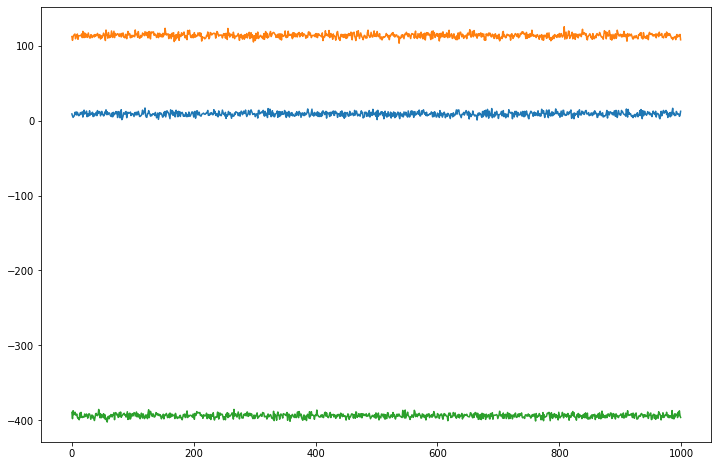

In [125]:
plt.figure(figsize=(12,8))
# plt.plot(az)
plt.plot(gyz)
plt.plot(gyy)
plt.plot(gyx)



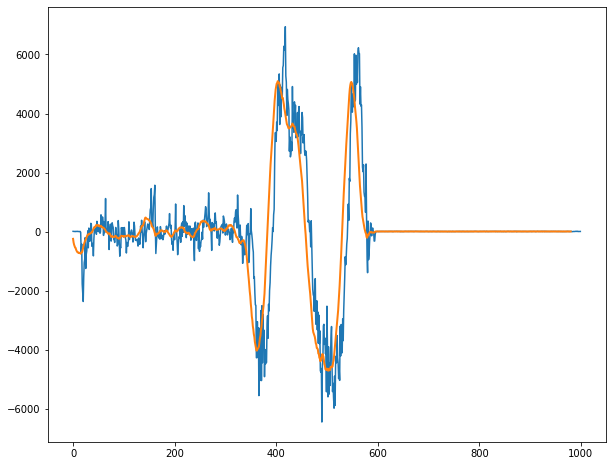

In [114]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

test = moving_average(gyz,20)

plt.figure(figsize=(10,8))
plt.plot(gyz)
plt.plot(test, lw=2)


In [106]:
x = np.linspace(0,len(gyz),len(gyz))

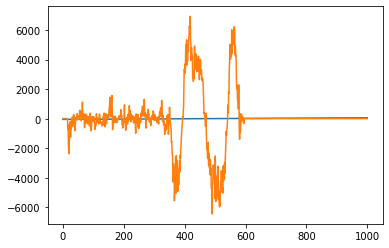

In [108]:
a = np.polyfit(x,gyz,1)
b = np.polyfit(x,gyy,1)
c = np.polyfit(x,gyx,1)

plt.plot(x,x*a[0]+a[1])
plt.plot(x,gyz)
# plt.plot(x,x*b[0]+b[1])
# plt.plot(x,gyy)
# plt.plot(x,x*c[0]+c[1])
# plt.plot(x,gyx)


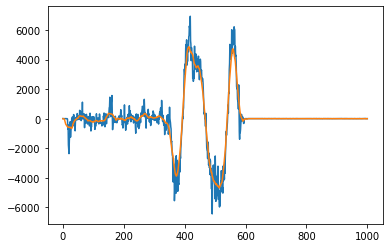

In [113]:
kernel_size = 25
kernel = np.ones(kernel_size) / kernel_size
data_convolved = np.convolve(gyz, kernel, mode='same')
plt.plot(x,gyz)
plt.plot(x,data_convolved)

In [52]:
10000*0.05/60

8.333333333333334